In [1]:
import random
import numpy as np
import networkx as nx
import itertools


In [3]:
A=np.array([[0,1,0,0,1],[1,0,1,1,1],[0,1,0,1,0],[0,1,1,0,1],[1,1,0,1,0]])
print(A)

def reliability(n,A,p):
    n_exp = 1000
    n_s = 0
    for i in range(n_exp):
        Arand=np.random.rand(n,n)
        #print(Arand)
        Arand=np.where(Arand<p,A,0)
        #print(Arand)
        G = nx.from_numpy_array(Arand)
        if nx.is_connected(G):
            n_s += 1
    R = n_s/n_exp
    print(R)   

[[0 1 0 0 1]
 [1 0 1 1 1]
 [0 1 0 1 0]
 [0 1 1 0 1]
 [1 1 0 1 0]]


In [4]:
A=np.array([[0,1,0,0,1],[1,0,1,1,1],[0,1,0,1,0],[0,1,1,0,1],[1,1,0,1,0]])
n = 5
p=0.7
reliability(n,A,p)

0.983


False

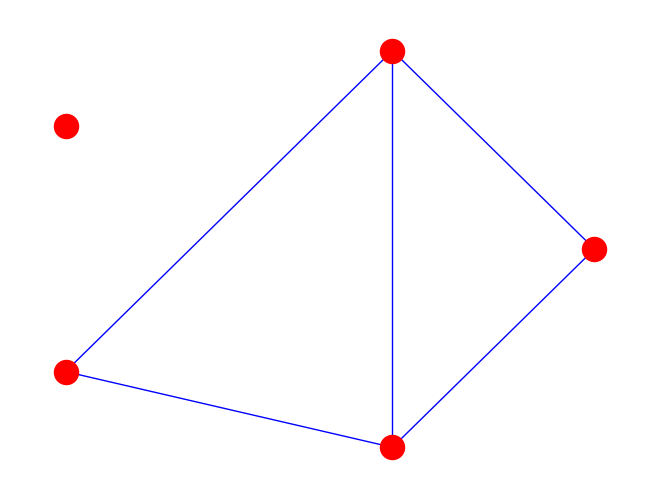

In [5]:
B=np.array([[0,1,0,0,1],[1,0,0,1,1],[0,0,0,0,0],[0,1,0,0,1],[1,1,0,1,0]])
T = nx.from_numpy_array(B)
nx.draw(T, pos=nx.circular_layout(T), node_color='r', edge_color='b')
nx.is_connected(T)

In [7]:
N = 10
L = 20
p=0.7

# Generate all networks with N nodes and L links
G = nx.generators.random_graphs.gnm_random_graph(N, L)

# Evaluate network reliability of each network in G
reliabilities = []
for G_i in (G.subgraph(c) for c in connected_components(G)):
    Y = nx.adjacency_matrix(G)
    ry = reliability(N,G,p)
    reliabilities.append((G_i, ry))

# Sort networks by reliability and find the most reliable network
reliabilities.sort(key=lambda x: x[1], reverse=True)
most_reliable_network = reliabilities[0][0]

print("Most reliable network:", most_reliable_network)

NameError: name 'connected_components' is not defined

[[0 1 1 1 1]
 [1 0 0 0 0]
 [1 0 0 1 0]
 [1 0 1 0 1]
 [1 0 0 1 0]]


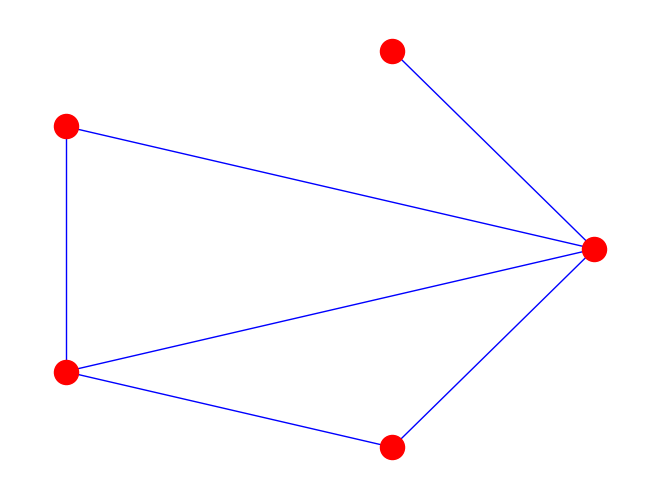

In [44]:
G = nx.generators.random_graphs.dense_gnm_random_graph(5,6)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')
Y = nx.adjacency_matrix(G)
Y=Y.todense()
print(Y)